In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data into a pandas DataFrame

df = pd.read_csv(r"C:\Uni_doc\eRD+data+October+2022.csv")

In [3]:
df.head()

,Region,Place Code,Place,ODS Code,GP Practice (ODS Code),Registered Patients,% of patients with a nomination,EPS Items,eRD Items,All Items,EPS Utilisation,eRD Utilisation (EPS Items),eRD Utilisation (All Items)
0,North East and Yorkshire,16C,Tees Valley,A81001,The Densham Surgery (A81001),4019.0,81.7%,8120,607,8172,99.4%,7.5%,7.4%
1,North East and Yorkshire,16C,Tees Valley,A81002,Queens Park Medical Centre (A81002),18288.0,86.3%,37318,10937,37357,99.9%,29.3%,29.3%
2,North East and Yorkshire,16C,Tees Valley,A81004,Acklam Medical Centre (A81004),11209.0,81.4%,18558,7163,18561,100.0%,38.6%,38.6%
3,North East and Yorkshire,16C,Tees Valley,A81005,Springwood Surgery (A81005),8032.0,83.5%,16682,7561,16727,99.7%,45.3%,45.2%
4,North East and Yorkshire,16C,Tees Valley,A81006,Tennant Street Medical Practice (A81006),14407.0,81.9%,30425,3378,30442,99.9%,11.1%,11.1%


In [4]:
#Check the dimensions of the data

df.shape

(6498, 13)

In [5]:
# Check for missing values

print(df.isnull().sum())


Region                               0
Place Code                           0
Place                                0
ODS Code                             0
GP Practice (ODS Code)               0
Registered Patients                 76
% of patients with a nomination    101
EPS Items                            0
eRD Items                            0
All Items                            0
EPS Utilisation                      0
eRD Utilisation (EPS Items)        149
eRD Utilisation (All Items)          0
dtype: int64


In [6]:
# Handle missing values 

df = df.fillna(0)

In [7]:
df.isnull().sum()

Region                             0
Place Code                         0
Place                              0
ODS Code                           0
GP Practice (ODS Code)             0
Registered Patients                0
% of patients with a nomination    0
EPS Items                          0
eRD Items                          0
All Items                          0
EPS Utilisation                    0
eRD Utilisation (EPS Items)        0
eRD Utilisation (All Items)        0
dtype: int64

In [8]:
# Check the data types of each column

print(df.dtypes)

Region                              object
Place Code                          object
Place                               object
ODS Code                            object
GP Practice (ODS Code)              object
Registered Patients                float64
% of patients with a nomination     object
EPS Items                            int64
eRD Items                            int64
All Items                            int64
EPS Utilisation                     object
eRD Utilisation (EPS Items)         object
eRD Utilisation (All Items)         object
dtype: object


In [9]:
# Convert 'Registered Patients' from float to integer
df['Registered Patients'] = df['Registered Patients'].astype(int)

# Convert '% of patients with a nomination' from object to float with 2 decimal places
df['% of patients with a nomination'] = df['% of patients with a nomination'].str.rstrip('%').astype('float') / 100.0

# Convert 'EPS Utilisation' from object to float with 2 decimal places
df['EPS Utilisation'] = df['EPS Utilisation'].str.rstrip('%').astype('float') / 100.0

# Convert 'eRD Utilisation (EPS Items)' from object to float with 2 decimal places
df['eRD Utilisation (EPS Items)'] = df['eRD Utilisation (EPS Items)'].str.rstrip('%').astype('float') / 100.0

# Convert 'eRD Utilisation (All Items)' from object to float with 2 decimal places
df['eRD Utilisation (All Items)'] = df['eRD Utilisation (All Items)'].str.rstrip('%').astype('float') / 100.0

In [10]:
df.dtypes

Region                              object
Place Code                          object
Place                               object
ODS Code                            object
GP Practice (ODS Code)              object
Registered Patients                  int32
% of patients with a nomination    float64
EPS Items                            int64
eRD Items                            int64
All Items                            int64
EPS Utilisation                    float64
eRD Utilisation (EPS Items)        float64
eRD Utilisation (All Items)        float64
dtype: object

In [11]:
# Check the summary statistics of the data

df.describe()

,Registered Patients,% of patients with a nomination,EPS Items,eRD Items,All Items,EPS Utilisation,eRD Utilisation (EPS Items),eRD Utilisation (All Items)
count,6498.000000,6397.000000,6498.000000,6498.000000,6498.000000,6498.000000,6349.000000,6498.000000
mean,9578.483687,0.721964,13164.658510,1983.329794,14402.142659,0.917178,0.145558,0.137239
std,6665.390940,0.153269,10146.726651,3135.090190,10407.910737,0.375298,0.167108,0.162945
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5372.500000,0.680000,6569.500000,24.000000,7494.500000,0.964000,0.004000,0.002000
50%,8276.000000,0.764000,11157.500000,652.500000,12128.500000,0.987000,0.070000,0.059500
75%,12094.000000,0.812000,17265.250000,2841.750000,18495.500000,0.995000,0.265000,0.250000
max,109562.000000,1.200000,146061.000000,42216.000000,148678.000000,26.000000,1.000000,0.973000


In [12]:
# Check for duplicate rows

df.duplicated().sum()

0

In [13]:
# Check the final shape of the data

print(df.shape)

(6498, 13)


In [54]:
# Save the cleaned data to a new csv file

df.to_csv(r"C:\Uni_doc\IEEE\Author\paper35\cleaned_electronic_prescription.csv", index=False)


In [55]:
# Load the cleaned_electronic_prescription dataset

df = pd.read_csv(r"C:\Uni_doc\IEEE\Author\paper35\cleaned_electronic_prescription.csv")

In [56]:
# Calculate the mean of the '% of patients with a nomination' column
mean_nomination = df['% of patients with a nomination'].mean()

# Print the mean
print("Mean of '% of patients with a nomination':", mean_nomination)

Mean of '% of patients with a nomination': 0.7219638893231184


In [57]:
# Create a new dataframe with only the providers with '% of patients with a nomination' less than mean
providers_less_than_mean = df[df['% of patients with a nomination'] < mean_nomination]

# Print the providers with '% of patients with a nomination' less than mean
"Providers with '% of patients with a nomination' less than mean:"
providers_less_than_mean[['ODS Code', 'Region', 'Place Code', 'Place', '% of patients with a nomination']]

,ODS Code,Region,Place Code,Place,% of patients with a nomination
11,A81016,North East and Yorkshire,16C,Tees Valley,0.714
18,A81023,North East and Yorkshire,16C,Tees Valley,0.635
22,A81029,North East and Yorkshire,16C,Tees Valley,0.615
27,A81035,North East and Yorkshire,16C,Tees Valley,0.692
29,A81037,North East and Yorkshire,16C,Tees Valley,0.678
...,...,...,...,...,...
6452,Y05330,London,93C,North Central London,0.609
6454,Y05349,North East and Yorkshire,03N,Sheffield,0.495
6458,Y05412,Midlands,03W,East Leicestershire & Rutland,0.531
6462,Y05750,North West,27D,Cheshire,0.215


In [58]:
# Calculate the mean of the 'EPS Utilisation' column
mean_utilisation = df['EPS Utilisation'].mean()

# Print the mean
"Mean of 'EPS Utilisation':", mean_utilisation

("Mean of 'EPS Utilisation':", 0.917177593105564)

In [59]:
# Create a new dataframe with only the providers with 'EPS Utilisation' less than mean
providers_less_than_mean_utilisation = df[df['EPS Utilisation'] < mean_utilisation]

# Print the providers with 'EPS Utilisation' less than mean
"Providers with 'EPS Utilisation' less than mean:"
providers_less_than_mean_utilisation[['ODS Code', 'Region', 'Place Code', 'Place', 'EPS Utilisation']]


,ODS Code,Region,Place Code,Place,EPS Utilisation
52,A81066,North East and Yorkshire,16C,Tees Valley,0.407
64,A81630,North East and Yorkshire,16C,Tees Valley,0.624
68,A82003,North West,01K,Morecambe Bay,0.854
69,A82004,North East and Yorkshire,01H,North Cumbria,0.575
76,A82012,North East and Yorkshire,01H,North Cumbria,0.338
...,...,...,...,...,...
6439,Y05163,London,72Q,South East London,0.000
6444,Y05251,North West,01D,"Heywood, Middleton & Rochdale",0.000
6445,Y05253,North West,01D,"Heywood, Middleton & Rochdale",0.000
6446,Y05257,London,93C,North Central London,0.785


In [60]:
import matplotlib.pyplot as plt

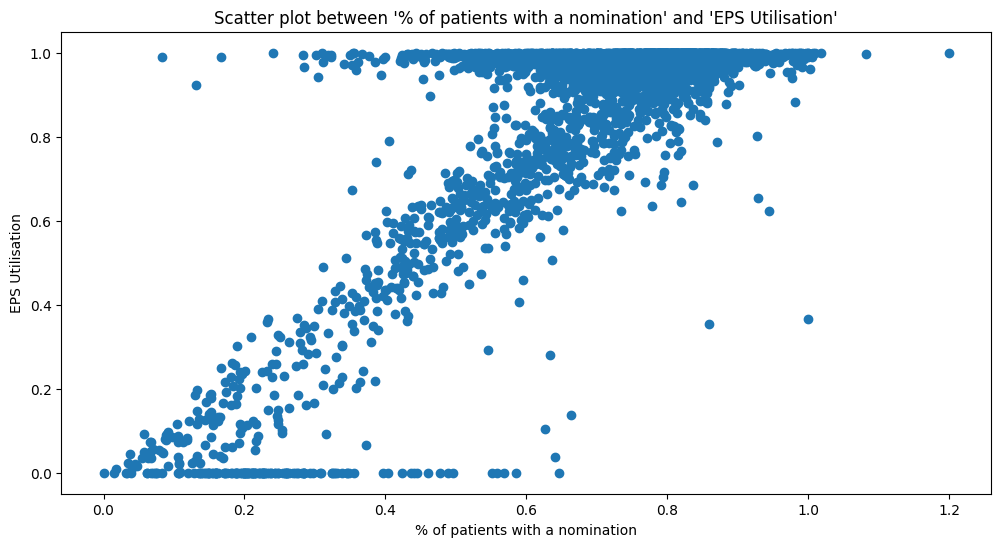

In [61]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot a scatter plot between '% of patients with a nomination' and 'EPS Utilisation'
plt.scatter(df['% of patients with a nomination'], df['EPS Utilisation'])
plt.xlabel("% of patients with a nomination")
plt.ylabel("EPS Utilisation")
plt.title("Scatter plot between '% of patients with a nomination' and 'EPS Utilisation'")
plt.show()

--------------------------------------

# Correlation

In [62]:
# Select the relevant columns for analysis
nomination_pct = df['% of patients with a nomination']
eps_utilisation = df['EPS Utilisation']

# Calculate the correlation coefficient
corr_coef = nomination_pct.corr(eps_utilisation)

# Print the correlation coefficient
print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: 0.8025828152566865


In [63]:
corr=df.corr()
corr

,Registered Patients,% of patients with a nomination,EPS Items,eRD Items,All Items,EPS Utilisation,eRD Utilisation (EPS Items),eRD Utilisation (All Items)
Registered Patients,1.000000,0.047628,0.815456,0.402134,0.819262,0.050195,0.015741,0.033733
% of patients with a nomination,0.047628,1.000000,0.322894,0.139839,0.112451,0.802583,-0.002630,0.092993
EPS Items,0.815456,0.322894,1.000000,0.523553,0.948533,0.135459,0.040821,0.076045
eRD Items,0.402134,0.139839,0.523553,1.000000,0.471197,0.096447,0.705227,0.716291
All Items,0.819262,0.112451,0.948533,0.471197,1.000000,-0.011415,-0.002723,0.003941
EPS Utilisation,0.050195,0.802583,0.135459,0.096447,-0.011415,1.000000,0.064994,0.132372
eRD Utilisation (EPS Items),0.015741,-0.002630,0.040821,0.705227,-0.002723,0.064994,1.000000,0.988817
eRD Utilisation (All Items),0.033733,0.092993,0.076045,0.716291,0.003941,0.132372,0.988817,1.000000


<AxesSubplot: >

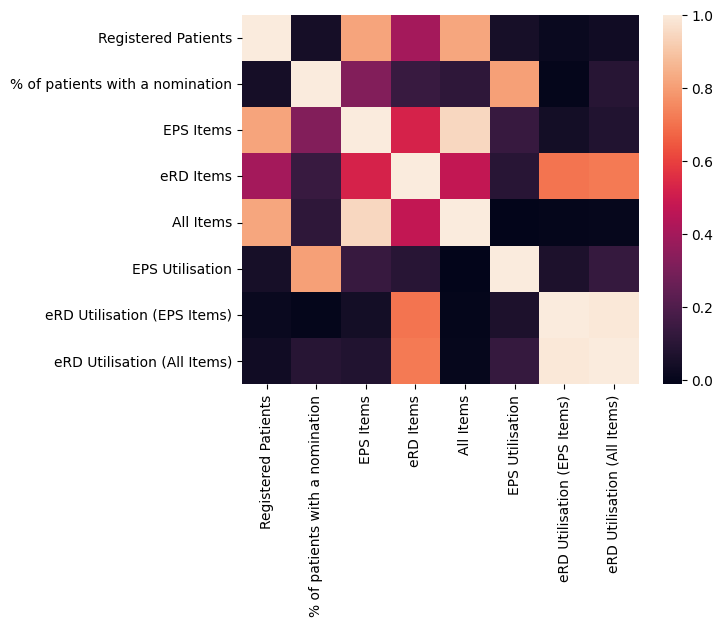

In [64]:
import seaborn as sns
sns.heatmap(corr)

--------------------------------------

In [65]:
from scipy import stats

In [30]:
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data):
    threshold = 3
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)

In [66]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((data < lower_bound) | (data > upper_bound))

In [67]:
# Check for outliers in each column

results = pd.DataFrame(columns=['Column', 'Number of Z-score outliers', 'Number of IQR outliers'])

for col in df.columns[5:]:
    data = df[col]
    outliers_zscore = detect_outliers_zscore(data)
    outliers_iqr = detect_outliers_iqr(data)
    
    results = results.append({
        'Column': col,
        'Number of Z-score outliers': len(outliers_zscore[0]),
        'Number of IQR outliers': len(outliers_iqr[0])
    }, ignore_index=True)

results

,Column,Number of Z-score outliers,Number of IQR outliers
0,Registered Patients,101,225
1,% of patients with a nomination,0,0
2,EPS Items,89,243
3,eRD Items,122,403
4,All Items,95,260
5,EPS Utilisation,1,1019
6,eRD Utilisation (EPS Items),0,0
7,eRD Utilisation (All Items),59,62


In [68]:
# Define a function to clip outliers at the 1st and 99th percentiles
def clip_outliers(data):
    p1 = np.percentile(data, 1)
    p99 = np.percentile(data, 99)
    return np.clip(data, p1, p99)

In [69]:
# create a new dataframe to hold the clipped data
clipped_df = pd.DataFrame()

In [70]:
# Create an empty list to store results
results = []

# loop through each column and clip the outliers
for col in df.columns[5:]:
    data = df[col]
    clipped_data = clip_outliers(data)
    clipped_df[col] = clipped_data
    
    # count the number of outliers before and after clipping
    outliers_zscore = detect_outliers_zscore(data)
    outliers_iqr = detect_outliers_iqr(data)
    clipped_outliers_zscore = detect_outliers_zscore(clipped_data)
    clipped_outliers_iqr = detect_outliers_iqr(clipped_data)
    
    # append a row to the results list
    results.append({'Column': col,
                    'Number of Z-score outliers before clipping': len(outliers_zscore[0]),
                    'Number of IQR outliers before clipping': len(outliers_iqr[0]),
                    'Number of Z-score outliers after clipping': len(clipped_outliers_zscore[0]),
                    'Number of IQR outliers after clipping': len(clipped_outliers_iqr[0]),
                   })

# create the final table by concatenating all rows in the results list
final_table = pd.concat([pd.DataFrame([r]) for r in results], ignore_index=True)

display(final_table)

,Column,Number of Z-score outliers before clipping,Number of IQR outliers before clipping,Number of Z-score outliers after clipping,Number of IQR outliers after clipping
0,Registered Patients,101,225,136,225
1,% of patients with a nomination,0,0,0,0
2,EPS Items,89,243,117,243
3,eRD Items,122,403,163,403
4,All Items,95,260,119,260
5,EPS Utilisation,1,1019,282,1018
6,eRD Utilisation (EPS Items),0,0,0,0
7,eRD Utilisation (All Items),59,62,66,0


In [111]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the data
data = pd.read_csv(r'C:\Uni_doc\cleaned_electronic_prescription.csv')
data.head()

,Region,Place Code,Place,ODS Code,GP Practice (ODS Code),Registered Patients,% of patients with a nomination,EPS Items,eRD Items,All Items,EPS Utilisation,eRD Utilisation (EPS Items),eRD Utilisation (All Items)
0,North East and Yorkshire,16C,Tees Valley,A81001,The Densham Surgery (A81001),4019,0.817,8120,607,8172,0.994,0.075,0.074
1,North East and Yorkshire,16C,Tees Valley,A81002,Queens Park Medical Centre (A81002),18288,0.863,37318,10937,37357,0.999,0.293,0.293
2,North East and Yorkshire,16C,Tees Valley,A81004,Acklam Medical Centre (A81004),11209,0.814,18558,7163,18561,1.000,0.386,0.386
3,North East and Yorkshire,16C,Tees Valley,A81005,Springwood Surgery (A81005),8032,0.835,16682,7561,16727,0.997,0.453,0.452
4,North East and Yorkshire,16C,Tees Valley,A81006,Tennant Street Medical Practice (A81006),14407,0.819,30425,3378,30442,0.999,0.111,0.111


# Label Encoding

In [112]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [113]:
label_encoder =LabelEncoder()
# Encode labels in column. 
data['Region']= label_encoder.fit_transform(data['Region'])
data['Place Code']= label_encoder.fit_transform(data['Place Code'])
data['Place']= label_encoder.fit_transform(data['Place'])
data['ODS Code']= label_encoder.fit_transform(data['ODS Code'])
data['GP Practice (ODS Code)']= label_encoder.fit_transform(data['GP Practice (ODS Code)'])


In [114]:
data.head()

,Region,Place Code,Place,ODS Code,GP Practice (ODS Code),Registered Patients,% of patients with a nomination,EPS Items,eRD Items,All Items,EPS Utilisation,eRD Utilisation (EPS Items),eRD Utilisation (All Items)
0,3,74,93,0,5201,4019,0.817,8120,607,8172,0.994,0.075,0.074
1,3,74,93,1,4127,18288,0.863,37318,10937,37357,0.999,0.293,0.293
2,3,74,93,2,52,11209,0.814,18558,7163,18561,1.000,0.386,0.386
3,3,74,93,3,4675,8032,0.835,16682,7561,16727,0.997,0.453,0.452
4,3,74,93,4,5039,14407,0.819,30425,3378,30442,0.999,0.111,0.111


In [115]:
data.isnull().sum()

Region                               0
Place Code                           0
Place                                0
ODS Code                             0
GP Practice (ODS Code)               0
Registered Patients                  0
% of patients with a nomination    101
EPS Items                            0
eRD Items                            0
All Items                            0
EPS Utilisation                      0
eRD Utilisation (EPS Items)        149
eRD Utilisation (All Items)          0
dtype: int64

In [116]:
data.dropna(subset=['% of patients with a nomination','eRD Utilisation (EPS Items)'], inplace=True)
data.shape

(6262, 13)

In [103]:
data.isnull().sum()

Region                             0
Place Code                         0
Place                              0
ODS Code                           0
GP Practice (ODS Code)             0
Registered Patients                0
% of patients with a nomination    0
EPS Items                          0
eRD Items                          0
All Items                          0
EPS Utilisation                    0
eRD Utilisation (EPS Items)        0
eRD Utilisation (All Items)        0
dtype: int64

# Feature Selection

In [82]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [117]:
#df_ckecked=data.copy()
df_ckecked=data.loc[:,:].copy()       

df_ckecked.shape

(6262, 13)

<AxesSubplot: xlabel='selection', ylabel='features'>

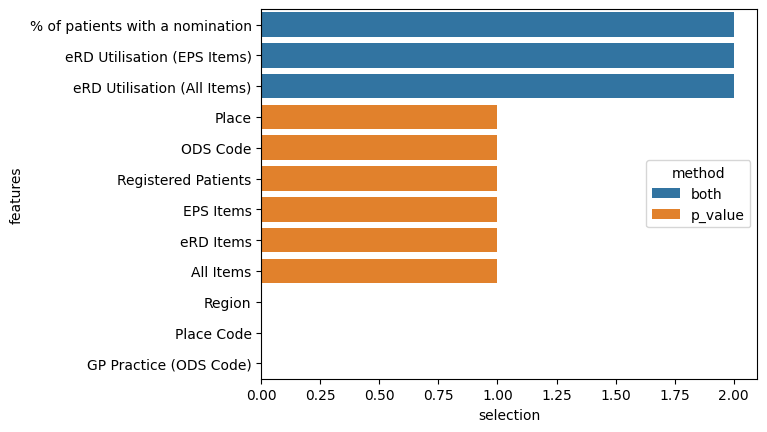

In [118]:
X = df_ckecked.drop("EPS Utilisation", axis=1).values
y = df_ckecked["EPS Utilisation"].values
feature_names = df_ckecked.drop("EPS Utilisation", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func= feature_selection.f_regression, k=9).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=9).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

In [119]:
df_ckecked.shape

(6262, 13)

In [120]:
data.shape

(6262, 13)

In [96]:
X_names = ['% of patients with a nomination','eRD Utilisation (EPS Items)','eRD Utilisation (All Items)','ODS Code', 'Registered Patients','EPS Items','eRD Items','All Items','EPS Utilisation']


In [121]:
data=data.loc[:,['% of patients with a nomination','eRD Utilisation (EPS Items)','eRD Utilisation (All Items)','ODS Code', 'Registered Patients','EPS Items','eRD Items','All Items','EPS Utilisation']].copy()       
#'colour',
data.head(3)

,% of patients with a nomination,eRD Utilisation (EPS Items),eRD Utilisation (All Items),ODS Code,Registered Patients,EPS Items,eRD Items,All Items,EPS Utilisation
0,0.817,0.075,0.074,0,4019,8120,607,8172,0.994
1,0.863,0.293,0.293,1,18288,37318,10937,37357,0.999
2,0.814,0.386,0.386,2,11209,18558,7163,18561,1.000


In [122]:
data

,% of patients with a nomination,eRD Utilisation (EPS Items),eRD Utilisation (All Items),ODS Code,Registered Patients,EPS Items,eRD Items,All Items,EPS Utilisation
0,0.817,0.075,0.074,0,4019,8120,607,8172,0.994
1,0.863,0.293,0.293,1,18288,37318,10937,37357,0.999
2,0.814,0.386,0.386,2,11209,18558,7163,18561,1.000
3,0.835,0.453,0.452,3,8032,16682,7561,16727,0.997
4,0.819,0.111,0.111,4,14407,30425,3378,30442,0.999
...,...,...,...,...,...,...,...,...,...
6463,0.699,0.000,0.000,6463,6245,4470,1,4588,0.974
6464,1.007,0.000,0.000,6464,145,5059,0,5059,1.000
6466,0.868,0.403,0.402,6466,7950,14411,5801,14424,0.999
6467,1.200,0.000,0.000,6467,5,31,0,31,1.000


In [107]:
df_ckecked

,Region,Place Code,Place,ODS Code,GP Practice (ODS Code),Registered Patients,% of patients with a nomination,EPS Items,eRD Items,All Items,EPS Utilisation,eRD Utilisation (EPS Items),eRD Utilisation (All Items)
0,3,74,93,0,5201,4019,0.817,8120,607,8172,0.994,0.075,0.074
1,3,74,93,1,4127,18288,0.863,37318,10937,37357,0.999,0.293,0.293
2,3,74,93,2,52,11209,0.814,18558,7163,18561,1.000,0.386,0.386
3,3,74,93,3,4675,8032,0.835,16682,7561,16727,0.997,0.453,0.452
4,3,74,93,4,5039,14407,0.819,30425,3378,30442,0.999,0.111,0.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,2,70,6,6463,5339,6245,0.699,4470,1,4588,0.974,0.000,0.000
6464,1,79,83,6464,4214,145,1.007,5059,0,5059,1.000,0.000,0.000
6466,5,57,12,6466,6129,7950,0.868,14411,5801,14424,0.999,0.403,0.402
6467,0,49,28,6467,2454,5,1.200,31,0,31,1.000,0.000,0.000


In [138]:
data_random = data.sample(frac=1 )

data_random.shape

(6262, 9)

In [139]:
# separate the target variable
y = data_random['EPS Utilisation']

# select the features to be used in the model
#features = ['Registered Patients', '% of patients with a nomination', 'EPS Items', 'eRD Items', 'All Items', 'eRD Utilisation (EPS Items)', 'eRD Utilisation (All Items)']
features = ['% of patients with a nomination','eRD Utilisation (EPS Items)','eRD Utilisation (All Items)','ODS Code', 'Registered Patients','EPS Items','eRD Items','All Items']
X = data_random[features]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
def score_list(algoname,score,yPredicted,details):
    return algoname, round(score,3), round(r2_score(y_test, yPredicted),2) , round(mean_absolute_error(y_test, yPredicted),2), round(mean_squared_error(y_test, yPredicted),2), round(np.sqrt(mean_squared_error(y_test, yPredicted)),2),details

score=[]

In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Check for NaN and infinity values in the input data
print(np.isnan(X_train).sum())
print(np.isinf(X_train).sum())

# Replace NaN values with the mean of the corresponding feature column
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))

# Check if the values are too large to be represented as float64
if np.max(X_train) > 1e15:
    X_train = X_train / 1e15



% of patients with a nomination    0
eRD Utilisation (EPS Items)        0
eRD Utilisation (All Items)        0
ODS Code                           0
Registered Patients                0
EPS Items                          0
eRD Items                          0
All Items                          0
dtype: int64
% of patients with a nomination    0
eRD Utilisation (EPS Items)        0
eRD Utilisation (All Items)        0
ODS Code                           0
Registered Patients                0
EPS Items                          0
eRD Items                          0
All Items                          0
dtype: int64


In [151]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))
if np.max(X_test) > 1e15:
    X_test = X_test / 1e15
y_pred = model.predict(X_test)

# Print the predicted results
print("Predicted values: ", y_pred)

Predicted values:  [0.97645184 1.027702   0.968112   ... 0.80522275 1.02297953 1.00716775]


In [127]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_error, r2_score

In [152]:
scr=model.score(X_test,y_test)
print(f"score {scr:.3f}")
print(f'mean squared error : {mean_squared_error(y_test,y_pred):.3f}')
print(f'mean absolute error :{mean_absolute_error(y_test,y_pred):.3f}')
print(f'sqrt mean absolute error : {np.sqrt(  mean_absolute_error(y_test,y_pred)):.3f}')
print(f'Coefficient of determination:{ r2_score(y_test, y_pred):.3f}')

score.append(score_list('LinearRegression',scr,y_pred,''))


score 0.823
mean squared error : 0.004
mean absolute error :0.036
sqrt mean absolute error : 0.191
Coefficient of determination:0.823


In [153]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)


RMSE:  0.06097880939506605


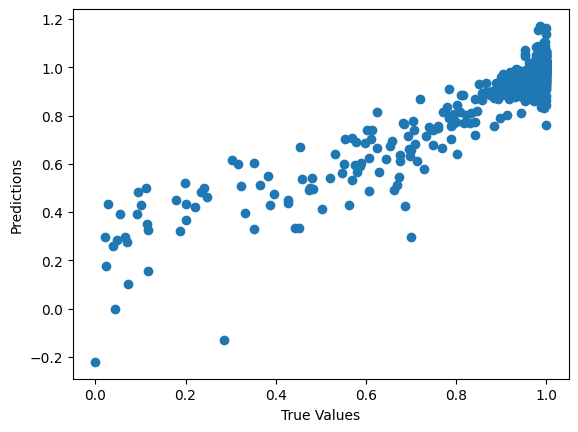

In [131]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# define the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# fit the model on the training data
dt_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_DT = dt_model.predict(X_test)

# calculate the mean squared error of the predictions
mse_DT = mean_squared_error(y_test, y_pred_DT)
print("Mean squared error:", mse_DT)


Mean squared error: 0.0034559441340782124


In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# define the Decision Tree model
dt_model_dt2 = DecisionTreeRegressor(random_state=42)

# fit the model on the training data
dt_model_dt2.fit(X_train, y_train)

# make predictions on the test data
y_pred_dt2 = dt_model_dt2.predict(X_test)

# calculate the mean squared error of the predictions
mse_dt2 = mean_squared_error(y_test, y_pred_dt2)

# calculate the root mean squared error of the predictions
rmse_dt2 = np.sqrt(mse_dt2)

print("Root mean squared error:", rmse_dt2)


Root mean squared error: 0.06379396829686527


In [135]:
scr_dt2=dt_model_dt2.score(X_test,y_test)
print(f"score {scr_dt2:.3f}")
print(f'mean squared error : {mean_squared_error(y_test,y_pred_dt2):.3f}')
print(f'mean absolute error :{mean_absolute_error(y_test,y_pred_dt2):.3f}')
print(f'sqrt mean absolute error : {np.sqrt(  mean_absolute_error(y_test,y_pred_dt2)):.3f}')
print(f'Coefficient of determination:{ r2_score(y_test, y_pred_dt2):.3f}')



score 0.843
mean squared error : 0.004
mean absolute error :0.029
sqrt mean absolute error : 0.171
Coefficient of determination:0.843


In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# create a random forest model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on the training data
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_RF = rf_model.predict(X_test)

# calculate the mean squared error of the predictions
mse_RF = mean_squared_error(y_test, y_pred_RF)

# calculate the root mean squared error of the predictions
rmse_RF = np.sqrt(mse_RF)

print("Root mean squared error:", rmse_RF)


Root mean squared error: 0.04452698772647455


In [157]:
scr_RF=rf_model.score(X_test,y_test)
print(f"score {scr_RF:.3f}")
print(f'mean squared error : {mean_squared_error(y_test,y_pred_RF):.3f}')
print(f'mean absolute error :{mean_absolute_error(y_test,y_pred_RF):.3f}')
print(f'sqrt mean absolute error : {np.sqrt(  mean_absolute_error(y_test,y_pred_RF)):.3f}')
print(f'Coefficient of determination:{ r2_score(y_test, y_pred_RF):.3f}')

score.append(score_list('RandomForestRegressor',scr_RF,y_pred_RF,''))


score 0.905
mean squared error : 0.002
mean absolute error :0.023
sqrt mean absolute error : 0.153
Coefficient of determination:0.905


# Compare the results

In [160]:
pd.DataFrame(score, columns=['Model', 'Score','r2_score', 'MAE', 'MSE', 'RMSE','Details'])

,Model,Score,r2_score,MAE,MSE,RMSE,Details
0,LinearRegression,0.823,0.82,0.04,0.0,0.06,
1,DecisionTreeRegressor,0.835,0.84,0.03,0.0,0.06,
2,RandomForestRegressor,0.905,0.91,0.02,0.0,0.04,


<AxesSubplot: xlabel='Model'>

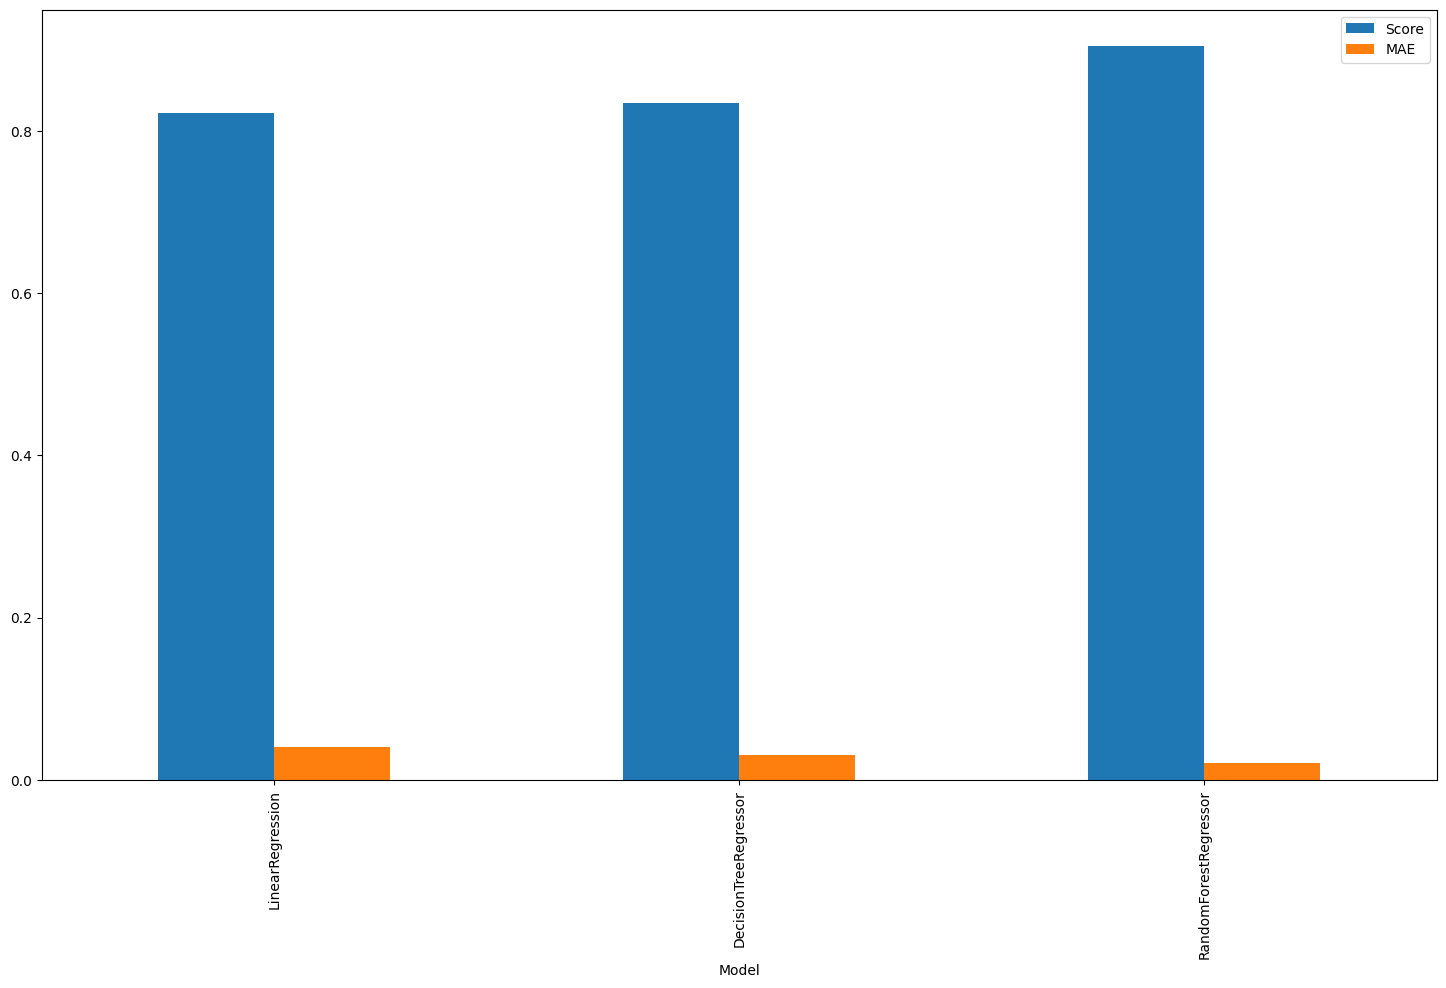

In [161]:
pd.DataFrame(score
             , columns=['Model', 'Score','r2_score'
                        , 'MAE', 'MSE', 'RMSE','details']).plot(x="Model"
                                                                       , y=["Score", "MAE"], kind="bar", figsize=(18,10))